In [1]:
import pandas as pd
from pulp import LpVariable, LpProblem, LpMaximize, LpStatus, value, LpMinimize
import networkx as nx
import matplotlib.pyplot as plt


### **Question 3**

In [4]:
import pulp

#prob
prob = pulp.LpProblem("Car_Maintenance", pulp.LpMinimize)

#variables
variables = {}
for i in range(6):
    for j in range(i + 1, 6):
        variables[f'x{i}{j}'] = pulp.LpVariable(f'x{i}{j}', cat='Binary')


costs = {
    'x01': 11000, 'x02': 15000, 'x03': 21000, 'x04': 31000, 'x05': 39000,
    'x12': 15000, 'x13': 21000, 'x14': 31000, 'x15': 39000,
    'x23': 21000, 'x24': 31000, 'x25': 39000,
    'x34': 31000, 'x35': 39000,
    'x45': 39000
}

#obj function
prob += pulp.lpSum([costs[key] * variables[key] for key in costs]), "Total Cost"

#constraint
prob += variables['x01'] + variables['x02'] + variables['x03'] + variables['x04'] + variables['x05'] == 1, "start"


for i in range(1, 5):
    incoming = [variables[f'x{j}{i}'] for j in range(i)]
    outgoing = [variables[f'x{i}{k}'] for k in range(i + 1, 6)]
    prob += pulp.lpSum(incoming) - pulp.lpSum(outgoing) == 0, f'y{i}'


prob += variables['x05'] + variables['x15'] + variables['x25'] + variables['x35'] + variables['x45'] == 1, "end"

#solve
prob.solve()

#print
print("Status:", pulp.LpStatus[prob.status])

# Print the decision variables and their optimal values
for variable in prob.variables():
    print(f"{variable.name} = {variable.varValue}")

# Print the optimal value of the objective function
print(f"Total Cost = {pulp.value(prob.objective)}")

Status: Optimal
x01 = 0.0
x02 = 0.0
x03 = 0.0
x04 = 0.0
x05 = 1.0
x12 = 0.0
x13 = 0.0
x14 = 0.0
x15 = 0.0
x23 = 0.0
x24 = 0.0
x25 = 0.0
x34 = 0.0
x35 = 0.0
x45 = 0.0
Total Cost = 39000.0


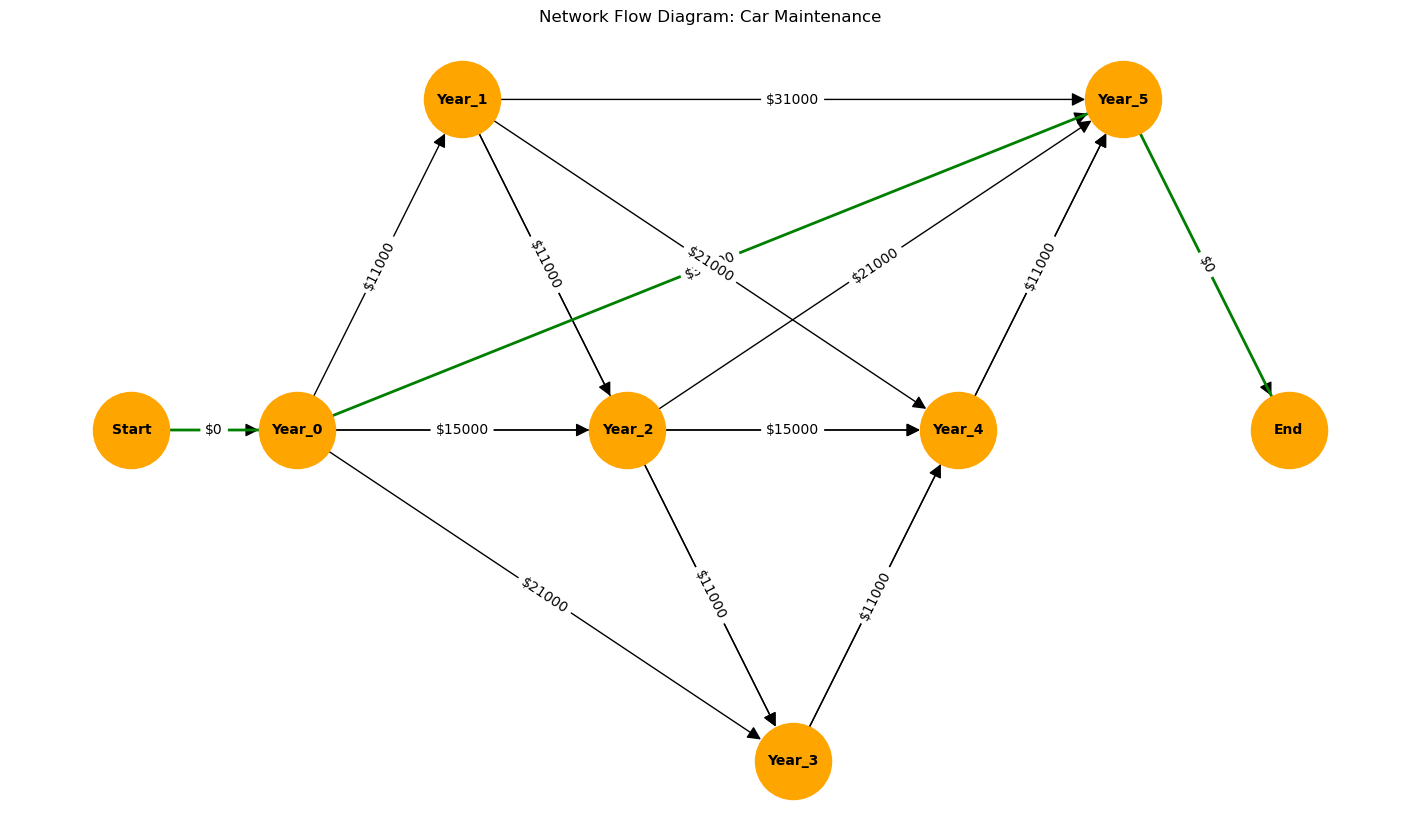

In [8]:
import networkx as nx
import matplotlib.pyplot as plt


G = nx.DiGraph()

G.add_node("Start")
for i in range(6):
    G.add_node(f"Year_{i}")
G.add_node("End")


edges = {
    ("Start", "Year_0"): 0,  
    ("Year_0", "Year_1"): 11000, ("Year_1", "Year_2"): 11000, ("Year_2", "Year_3"): 11000, ("Year_3", "Year_4"): 11000, ("Year_4", "Year_5"): 11000,
    ("Year_0", "Year_2"): 15000, ("Year_1", "Year_3"): 15000, ("Year_2", "Year_4"): 15000, ("Year_3", "Year_5"): 15000,
    ("Year_0", "Year_3"): 21000, ("Year_1", "Year_4"): 21000, ("Year_2", "Year_5"): 21000,
    ("Year_0", "Year_4"): 31000, ("Year_1", "Year_5"): 31000,
    ("Year_0", "Year_5"): 39000,
    ("Year_5", "End"): 0  
}

#edges
for edge, weight in edges.items():
    G.add_edge(edge[0], edge[1], weight=weight, label=f"${weight}")

#nodes
pos = {
    "Start": (0, 0),
    "Year_0": (1, 0),
    "Year_1": (2, 1),
    "Year_2": (3, 0),
    "Year_3": (4, -1),
    "Year_4": (5, 0),
    "Year_5": (6, 1),
    "End": (7, 0)
}

#optimal path
optimal_path = ["Start", "Year_0", "Year_5", "End"]

plt.figure(figsize=(14, 8))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='orange', font_size=10, font_weight='bold', arrowsize=20)

path_edges = list(zip(optimal_path, optimal_path[1:]))
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='green', width=2)

edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black')

plt.title("Network Flow Diagram: Car Maintenance")
plt.show()

### **Question 4**

In [10]:
from pulp import LpVariable, LpProblem, LpMinimize, LpStatus, value

#prob
prob = LpProblem("MinimumCostNetworkFlow", LpMinimize)

#decision variables w/ bounds
x12 = LpVariable("x12", 0, 500)
x13 = LpVariable("x13", 0, 500)
x14 = LpVariable("x14", 0, 400)
x25 = LpVariable("x25", 0, 300)
x26 = LpVariable("x26", 0, 350)
x35 = LpVariable("x35", 0, 400)
x36 = LpVariable("x36", 0, 300)
x37 = LpVariable("x37", 0, 250)
x47 = LpVariable("x47", 0, 400)
x56 = LpVariable("x56", 0, 200)
x59 = LpVariable("x59", 0, 600)
x69 = LpVariable("x69", 0, 900)
x78 = LpVariable("x78", 0, 700)
x89 = LpVariable("x89", 0, 700)

#obj function
prob += 16 * x12 + 30 * x13 + 7 * x14 + 17 * x25 + 12 * x26 + 1 * x35 + 4 * x36 + 18 * x37 + 20 * x47 + 13 * x56 + 5 * x59 + 5 * x69 + 2 * x78 + 7 * x89

#start and ending point
start = 900  
end = 900  

#flow constraints
prob += x12 + x13 + x14 == start   
prob += x25 + x26 - x12 == 0        
prob += x35 + x36 + x37 - x13 == 0  
prob += x47 - x14 == 0              
prob += x59 + x56 - x25 - x35 == 0  
prob += x69 - x26 - x36 == 0        
prob += x78 - x37 - x47 == 0        
prob += x89 - x47 - x78 == 0        
prob += x59 + x69 + x89 == end   

#solve
status = prob.solve()
print(f"Problem status: {LpStatus[status]}")

#print
for variable in prob.variables():
    print(f"{variable.name} = {variable.varValue}")

print(f"Objective (total travel time) = {value(prob.objective)}")

Problem status: Optimal
x12 = 500.0
x13 = 400.0
x14 = 0.0
x25 = 150.0
x26 = 350.0
x35 = 400.0
x36 = 0.0
x37 = 0.0
x47 = 0.0
x56 = 0.0
x59 = 550.0
x69 = 350.0
x78 = 0.0
x89 = 0.0
Objective (total travel time) = 31650.0


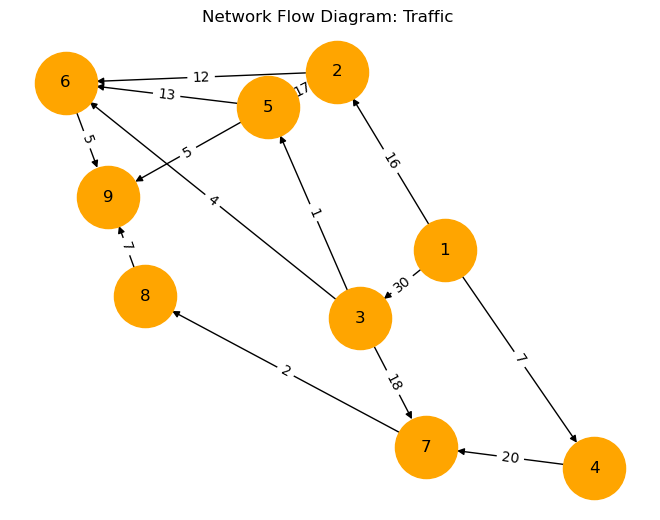

In [12]:
G = nx.DiGraph()

nodes = list(range(1, 10))
G.add_nodes_from(nodes)

#edges
edges = {
    (1, 2): 16, (1, 3): 30, (1, 4): 7,
    (2, 5): 17, (2, 6): 12,
    (3, 5): 1, (3, 6): 4, (3, 7): 18,
    (4, 7): 20,
    (5, 6): 13, (5, 9): 5,
    (6, 9): 5,
    (7, 8): 2,
    (8, 9): 7
}

for (u, v), cost in edges.items():
    G.add_edge(u, v, weight=cost)

#print
pos = nx.spring_layout(G, seed=42)  # For consistent layout
labels = nx.get_edge_attributes(G, 'weight')
nx.draw(G, pos, with_labels=True, node_color='orange', node_size=2000, font_size=12)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title('Network Flow Diagram: Traffic ')
plt.show()

### **Question 5**

In [2]:
import pandas as pd
from pulp import LpVariable, LpProblem, LpMaximize, LpStatus, value, LpMinimize

#variables
Prof1_Fall_Marketing = LpVariable("Prof1_Fall_Marketing", 0, None) 
Prof1_Fall_Finance = LpVariable("Prof1_Fall_Finance", 0, None) 
Prof1_Fall_Production = LpVariable("Prof1_Fall_Production", 0, None) 
Prof1_Spring_Marketing = LpVariable("Prof1_Spring_Marketing", 0, None) 
Prof1_Spring_Finance = LpVariable("Prof1_Spring_Finance", 0, None) 
Prof1_Spring_Production = LpVariable("Prof1_Spring_Production", 0, None) 
Prof2_Fall_Marketing = LpVariable("Prof2_Fall_Marketing", 0, None) 
Prof2_Fall_Finance = LpVariable("Prof2_Fall_Finance", 0, None) 
Prof2_Fall_Production = LpVariable("Prof2_Fall_Production", 0, None) 
Prof2_Spring_Marketing = LpVariable("Prof2_Spring_Marketing", 0, None) 
Prof2_Spring_Finance = LpVariable("Prof2_Spring_Finance", 0, None) 
Prof2_Spring_Production = LpVariable("Prof2_Spring_Production", 0, None) 
Prof3_Fall_Marketing = LpVariable("Prof3_Fall_Marketing", 0, None) 
Prof3_Fall_Finance = LpVariable("Prof3_Fall_Finance", 0, None) 
Prof3_Fall_Production = LpVariable("Prof3_Fall_Production", 0, None) 
Prof3_Spring_Marketing = LpVariable("Prof3_Spring_Marketing", 0, None) 
Prof3_Spring_Finance = LpVariable("Prof3_Spring_Finance", 0, None) 
Prof3_Spring_Production = LpVariable("Prof3_Spring_Production", 0, None)

#problem
prob = LpProblem("problem", LpMaximize)

#4 Courses Per Year
prob += Prof1_Fall_Marketing + Prof1_Fall_Finance + Prof1_Fall_Production + Prof1_Spring_Marketing + Prof1_Spring_Finance + Prof1_Spring_Production == 4
prob += Prof2_Fall_Marketing + Prof2_Fall_Finance + Prof2_Fall_Production + Prof2_Spring_Marketing + Prof2_Spring_Finance + Prof2_Spring_Production == 4
prob += Prof3_Fall_Marketing + Prof3_Fall_Finance + Prof3_Fall_Production + Prof3_Spring_Marketing + Prof3_Spring_Finance + Prof3_Spring_Production == 4

#four sections each class
prob += Prof1_Fall_Marketing + Prof2_Fall_Marketing + Prof3_Fall_Marketing + Prof1_Spring_Marketing + Prof2_Spring_Marketing + Prof3_Spring_Marketing >= 4
prob += Prof1_Fall_Finance + Prof2_Fall_Finance + Prof3_Fall_Finance + Prof1_Spring_Finance + Prof2_Spring_Finance + Prof3_Spring_Finance >= 4
prob += Prof1_Fall_Production + Prof2_Fall_Production + Prof3_Fall_Production + Prof1_Spring_Production + Prof2_Spring_Production + Prof3_Spring_Production >= 4

#one section per semester
prob += Prof1_Fall_Marketing + Prof2_Fall_Marketing + Prof3_Fall_Marketing >= 1
prob += Prof1_Fall_Finance + Prof2_Fall_Finance + Prof3_Fall_Finance >= 1
prob += Prof1_Fall_Production + Prof2_Fall_Production + Prof3_Fall_Production >= 1
prob += Prof1_Spring_Marketing + Prof2_Spring_Marketing + Prof3_Spring_Marketing >= 1
prob += Prof1_Spring_Finance + Prof2_Spring_Finance + Prof3_Spring_Finance >= 1
prob += Prof1_Spring_Production + Prof2_Spring_Production + Prof3_Spring_Production >= 1

#obj function
prob += (6*Prof1_Fall_Marketing) + (8*Prof1_Fall_Finance) + (11*Prof1_Fall_Production) + (10*Prof1_Spring_Marketing) +  (7*Prof1_Spring_Finance) + (9*Prof1_Spring_Production) + (10*Prof2_Fall_Marketing) + (12*Prof2_Fall_Finance) + (7*Prof2_Fall_Production) + (9*Prof2_Spring_Marketing) + (8*Prof2_Spring_Finance) + (10*Prof2_Spring_Production) + (9*Prof3_Fall_Marketing) + (10*Prof3_Fall_Finance) + (12*Prof3_Fall_Production) + (11*Prof3_Spring_Marketing) + (10*Prof3_Spring_Finance) + (11*Prof3_Spring_Production)

# Solve the problem
status = prob.solve()
LpStatus[status]

# Print the solution
print ("Optimal Solution:")
for variable in prob.variables():
    print(variable.name, " = ", value(variable), " courses taught by this professor on this subject during this semester")

print("Total Satisfaction = ", value(prob.objective), " units")

Optimal Solution:
Prof1_Fall_Finance  =  0.0  courses taught by this professor on this subject during this semester
Prof1_Fall_Marketing  =  0.0  courses taught by this professor on this subject during this semester
Prof1_Fall_Production  =  1.0  courses taught by this professor on this subject during this semester
Prof1_Spring_Finance  =  0.0  courses taught by this professor on this subject during this semester
Prof1_Spring_Marketing  =  3.0  courses taught by this professor on this subject during this semester
Prof1_Spring_Production  =  0.0  courses taught by this professor on this subject during this semester
Prof2_Fall_Finance  =  3.0  courses taught by this professor on this subject during this semester
Prof2_Fall_Marketing  =  1.0  courses taught by this professor on this subject during this semester
Prof2_Fall_Production  =  0.0  courses taught by this professor on this subject during this semester
Prof2_Spring_Finance  =  0.0  courses taught by this professor on this subject 

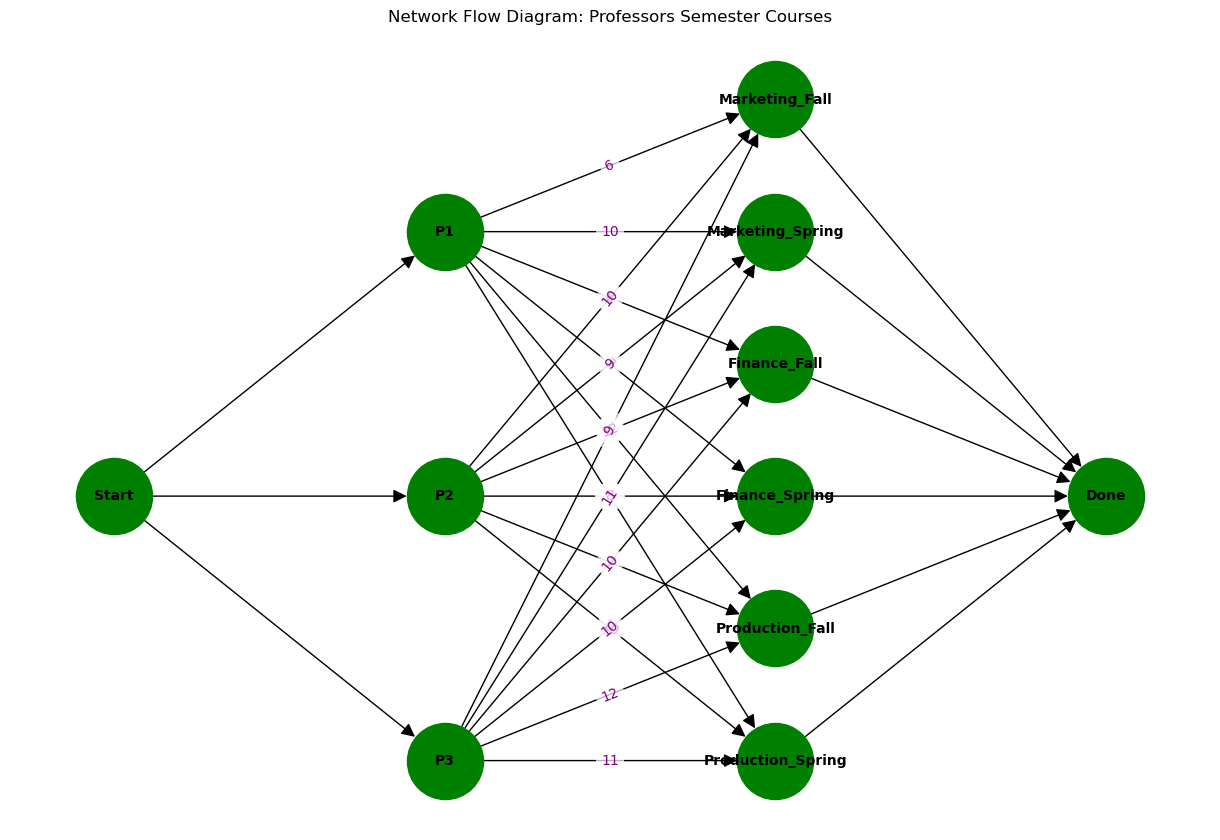

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

#nodes
G.add_node("Start")
for i in range(1, 4):
    G.add_node(f"P{i}")
for j in ["Marketing", "Finance", "Production"]:
    for k in ["Fall", "Spring"]:
        G.add_node(f"{j}_{k}")
G.add_node("Done")

#edges
G.add_edge("Start", "P1", capacity=4)
G.add_edge("Start", "P2", capacity=4)
G.add_edge("Start", "P3", capacity=4)

#profs
satisfaction = {
    "P1": {"Marketing_Fall": 6, "Marketing_Spring": 10, "Finance_Fall": 8, "Finance_Spring": 7, "Production_Fall": 11, "Production_Spring": 9},
    "P2": {"Marketing_Fall": 10, "Marketing_Spring": 9, "Finance_Fall": 12, "Finance_Spring": 8, "Production_Fall": 7, "Production_Spring": 10},
    "P3": {"Marketing_Fall": 9, "Marketing_Spring": 11, "Finance_Fall": 10, "Finance_Spring": 10, "Production_Fall": 12, "Production_Spring": 11}
}

for p, classes in satisfaction.items():
    for cls, sat in classes.items():
        G.add_edge(p, cls, weight=sat, label=str(sat))

# Class-Term nodes to Sink
for j in ["Marketing", "Finance", "Production"]:
    for k in ["Fall", "Spring"]:
        G.add_edge(f"{j}_{k}", "Done", capacity=1)

# Define node positions for a cleaner layout
pos = {
    "Start": (0, 0),
    "P1": (1, 2), "P2": (1, 0), "P3": (1, -2),
    "Marketing_Fall": (2, 3), "Marketing_Spring": (2, 2),
    "Finance_Fall": (2, 1), "Finance_Spring": (2, 0),
    "Production_Fall": (2, -1), "Production_Spring": (2, -2),
    "Done": (3, 0)
}

# Draw the graph
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="green", font_size=10, font_weight="bold", arrowsize=20)

# Adjusting the label positions
labels = nx.get_edge_attributes(G, 'label')

def shift_position(pos, shift, direction):
    """Shift a position tuple in a specific direction."""
    x, y = pos
    if direction == "left":
        return (x - shift, y)
    elif direction == "right":
        return (x + shift, y)
    elif direction == "up":
        return (x, y + shift)
    elif direction == "down":
        return (x, y - shift)
    return pos

edgeplace = {edge: shift_position(pos[edge[0]], 0.1, "left") for edge in G.edges if edge[0].startswith("P")}

for edge in G.edges:
    if edge[0] == "Start":
        edgeplace[edge] = shift_position(pos[edge[0]], 0.1, "right")
    elif edge[1] == "Done":
        edgeplace[edge] = shift_position(pos[edge[1]], 0.1, "left")

nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='purple', bbox=dict(facecolor='white', edgecolor='none', alpha=0.7), font_size=10)
plt.title("Network Flow Diagram: Professors Semester Courses")
plt.show()
